In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

# Replace 'your-folder' with the folder path where your CSV file is stored
file_path = '/content/drive/My Drive/Info_CSV/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [10]:
### Handling the Missing Values

### Fill Numeric Columns with their Mean

df_numeric = df.select_dtypes(include=['number'])
df_numeric.fillna(df_numeric.mean(), inplace=True)

### Fill Non-Numeric Columns with their Mode

df_non_numeric = df.select_dtypes(exclude=['number'])
for col in df_non_numeric.columns:
    df_non_numeric[col].fillna(df_non_numeric[col].mode()[0], inplace=True)

### Concat Both the Columns

df = pd.concat([df_numeric, df_non_numeric], axis=1)

<ipython-input-10-5024347b3fea>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_non_numeric[col].fillna(df_non_numeric[col].mode()[0], inplace=True)


In [11]:
### Encoding Categorical Values

label_encoders = {}
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Geographic Information',
                       'Occupation', 'Policy Type', 'Preferred Communication Channel',
                       'Preferred Contact Time', 'Preferred Language']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()


,Customer ID,Age,Income Level,Coverage Amount,Premium Amount,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,70541,366603,2749,0,1,0,22,3,policy5,04-10-2018,Phone,policy2,2,Email,1,0,0,Segment5
1,95568,26,54168,780236,1966,1,4,2,10,5,policy5,11-06-2018,Chat,policy1,2,Mail,1,3,1,Segment5
2,10544,29,73899,773926,4413,0,3,0,27,3,policy5,06-05-2021,Email,policy3,2,Email,2,2,2,Segment3
3,77033,20,63381,787815,4342,1,0,1,28,3,policy5,09-02-2018,Chat,policy2,1,Text,1,1,1,Segment3
4,88160,25,38794,366506,1276,0,2,1,34,5,policy1,09-10-2018,Chat,policy4,1,Email,4,4,0,Segment2


In [13]:
### Scaling Numerical Features

## Check for Non-Numeric Values in Numeric Columns
for col in numerical_columns:
    print(f"Column {col} has non-numeric values: ", df[col].apply(lambda x: isinstance(x, (int, float))).all())

## Convert Non-Numeric Values to Numeric
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

## Apply Scalar Feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Column Age has non-numeric values:  True
Column Income Level has non-numeric values:  True
Column Coverage Amount has non-numeric values:  True
Column Premium Amount has non-numeric values:  True
Column Insurance Products Owned has non-numeric values:  False
Column Interactions with Customer Service has non-numeric values:  False


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [14]:
### Adding New Features

# Demographic Analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df['Gender_Proportion'] = df['Gender'].map(df['Gender'].value_counts(normalize=True))
df['Income_Bracket'] = pd.qcut(df['Income Level'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Financial Impact
df['Spending_Per_Customer'] = df['Premium Amount'] / df['Insurance Products Owned']
df['Credit_Risk'] = np.random.choice(['Low', 'Medium', 'High'], len(df))

# Purchasing Patterns
df['Frequent_Purchases'] = np.random.randint(1, 10, len(df))
df['Seasonal_Buying'] = np.random.choice(['Winter', 'Spring', 'Summer', 'Autumn'], len(df))

# Loyalty Metrics
df['Loyalty_Score'] = np.random.uniform(0, 1, len(df))
df['Reward_Program'] = np.random.choice([0, 1], len(df))

# Behavioral Insights
df['Browsing_History'] = np.random.randint(5, 50, len(df))
df['Cart_Abandonment'] = np.random.randint(0, 10, len(df))

# Market Trends
df['Tech_Adoption'] = np.random.choice(['Low', 'Medium', 'High'], len(df))
df['Competitor_Comparison'] = np.random.uniform(0, 1, len(df))

df.head()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount,Gender,Marital Status,Education Level,Geographic Information,Occupation,...,Spending_Per_Customer,Credit_Risk,Frequent_Purchases,Seasonal_Buying,Loyalty_Score,Reward_Program,Browsing_History,Cart_Abandonment,Tech_Adoption,Competitor_Comparison
0,84966,-1.401980,-0.333617,-0.469361,-0.213640,0,1,0,22,3,...,NaN,Medium,9,Spring,0.872575,0,44,3,High,0.973923
1,95568,-1.203033,-0.780348,1.071729,-0.822588,1,4,2,10,5,...,NaN,Low,4,Spring,0.927864,1,45,3,High,0.313676
2,10544,-1.004085,-0.241996,1.048219,1.080474,0,3,0,27,3,...,NaN,Medium,2,Winter,0.389606,0,29,6,Medium,0.718350
3,77033,-1.600928,-0.528975,1.099966,1.025256,1,0,1,28,3,...,NaN,High,8,Winter,0.625659,0,27,7,High,0.275229
4,88160,-1.269349,-1.199821,-0.469722,-1.359210,0,2,1,34,5,...,NaN,High,3,Spring,0.290605,1,17,3,Medium,0.662441


In [18]:
### Check for missing values
missing_values = df[selected_features].isnull().sum()
print("Missing values in each column:\n", missing_values)

if df[selected_features].isnull().sum().sum() == 0:
    print("All missing values have been filled.")
else:
    print("There are still missing values.")



Missing values in each column:
 Age                             0
Income Level                    0
Coverage Amount                 0
Premium Amount                  0
Insurance Products Owned    53503
Spending_Per_Customer       53503
Loyalty_Score                   0
Frequent_Purchases              0
Browsing_History                0
Cart_Abandonment                0
dtype: int64
There are still missing values.


In [27]:
# Reset index
df = df.reset_index(drop=True)

# Handle missing values
if 'Spending_Per_Customer' in df.columns:
    df['Spending_Per_Customer'] = df['Spending_Per_Customer'].fillna(df['Spending_Per_Customer'].mean())

if 'Insurance Products Owned' in df.columns:
    df['Insurance Products Owned'] = df['Insurance Products Owned'].fillna(df['Insurance Products Owned'].mode()[0])

# Convert categorical column to numeric
df['Insurance Products Owned'] = df['Insurance Products Owned'].astype('category').cat.codes

# Ensure all selected features are numeric
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values
df[selected_features] = df[selected_features].fillna(0)  # or use column mean

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[selected_features])

print("Clustering successful!")



Clustering successful!


In [28]:
### Cluster Analysis

cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Income Level': 'mean',
    'Coverage Amount': 'mean',
    'Premium Amount': 'mean',
    'Insurance Products Owned': 'mean',
    'Spending_Per_Customer': 'mean',
    'Loyalty_Score': 'mean',
    'Frequent_Purchases': 'mean',
    'Browsing_History': 'mean',
    'Cart_Abandonment': 'mean'
}).reset_index()

cluster_analysis


,Cluster,Age,Income Level,Coverage Amount,Premium Amount,Insurance Products Owned,Spending_Per_Customer,Loyalty_Score,Frequent_Purchases,Browsing_History,Cart_Abandonment
0,0,-0.803410,0.029655,-0.694379,0.718543,0.0,0.0,-0.010264,-0.091759,0.017683,0.015887
1,1,1.128506,0.094269,-0.633141,0.459011,0.0,0.0,0.051222,0.137480,-0.047841,0.062270
2,2,-0.135767,-0.058770,1.020176,0.031371,0.0,0.0,-0.004827,0.945231,0.002424,-0.042713
3,3,0.166975,-0.066381,0.991314,0.038767,0.0,0.0,-0.019006,-0.988027,0.022710,-0.023672
4,4,-0.233667,-0.001322,-0.573024,-1.248422,0.0,0.0,-0.014647,-0.009685,0.002538,-0.012074


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


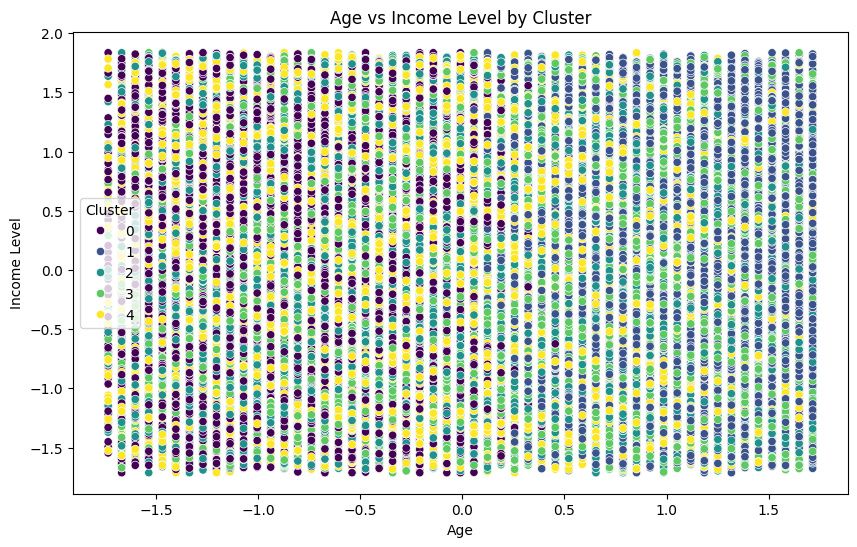

In [29]:
### Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Income Level'], hue=df['Cluster'], palette='viridis')
plt.title("Age vs Income Level by Cluster")
plt.xlabel("Age")
plt.ylabel("Income Level")
plt.legend(title="Cluster")
plt.show()


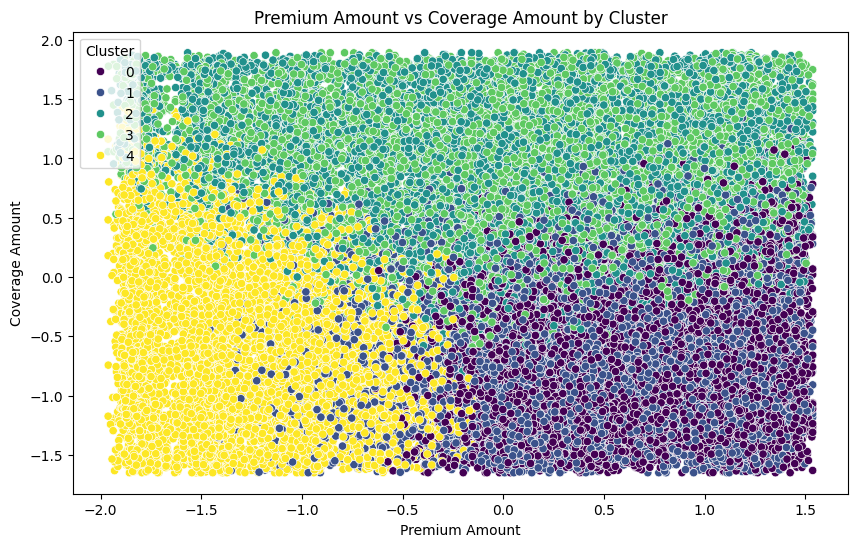

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Premium Amount'], y=df['Coverage Amount'], hue=df['Cluster'], palette='viridis')
plt.title("Premium Amount vs Coverage Amount by Cluster")
plt.xlabel("Premium Amount")
plt.ylabel("Coverage Amount")
plt.legend(title="Cluster")
plt.show()


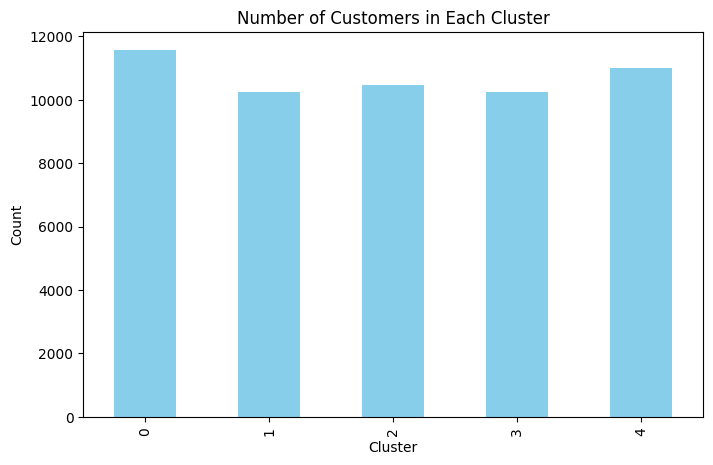

In [31]:
plt.figure(figsize=(8, 5))
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


In [32]:
### Model Performance
silhouette_avg = silhouette_score(df[selected_features], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.0832


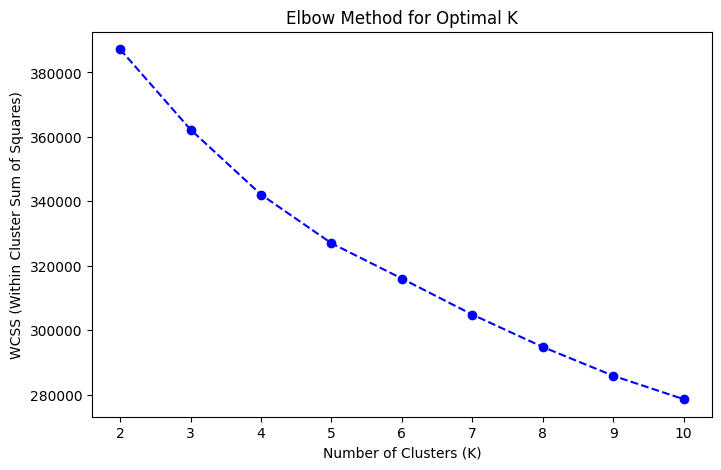

In [33]:
### Elbow Method to determine Optimal Clusters
wcss = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[selected_features])
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster centers

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
